In [1]:
import matplotlib.pyplot as plt
import numpy as np
from threshold import * 
from calibration import calibrate
from transform import *
from lane_detection import * 
import cv2
import glob
%matplotlib inline
%config InlineBackend.figure_format='retina'

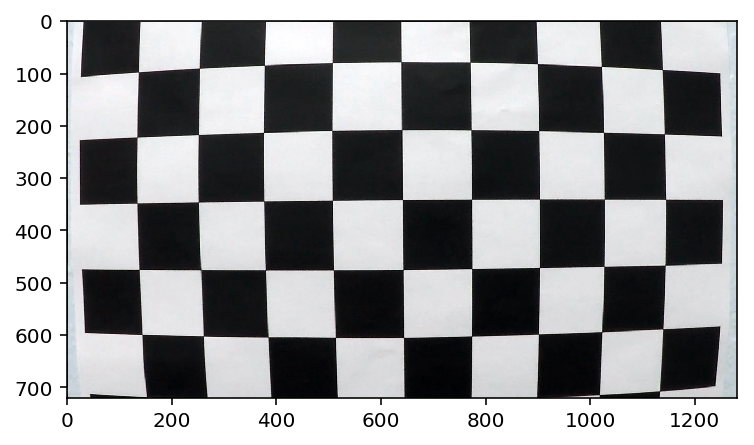

In [2]:
# 1. Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
mtx, dist = calibrate()
cal_image = cv2.imread('./camera_cal/calibration1.jpg')
plt.imshow(cal_image)

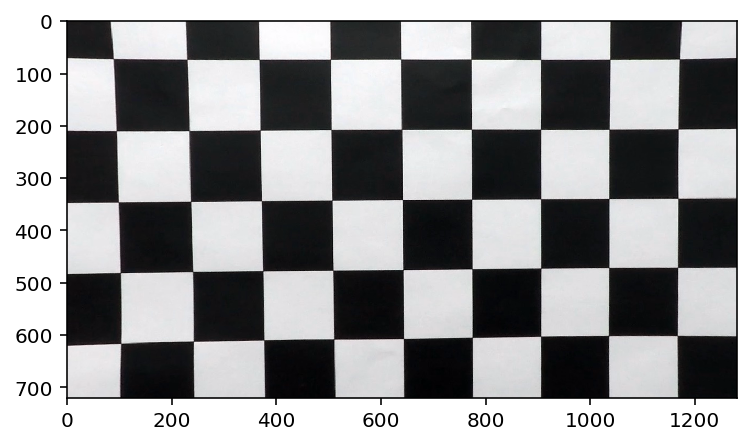

In [3]:
undist = cv2.undistort(cal_image, mtx, dist, None, mtx)
plt.imshow(undist)

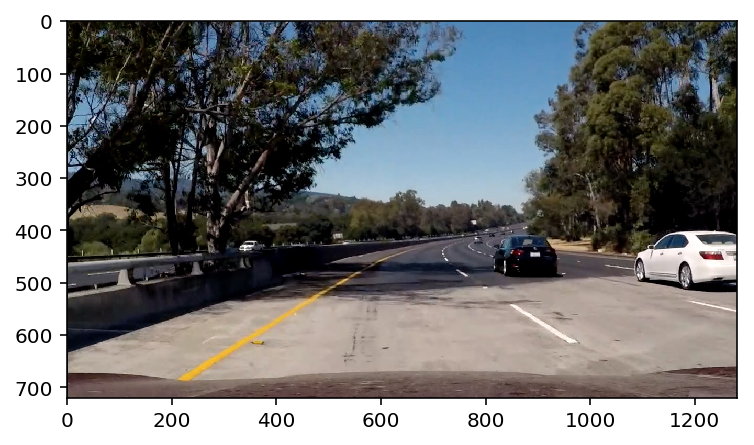

In [4]:
# 2. Apply a distortion correction to raw images.
image = cv2.imread('./test_images/test5.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)

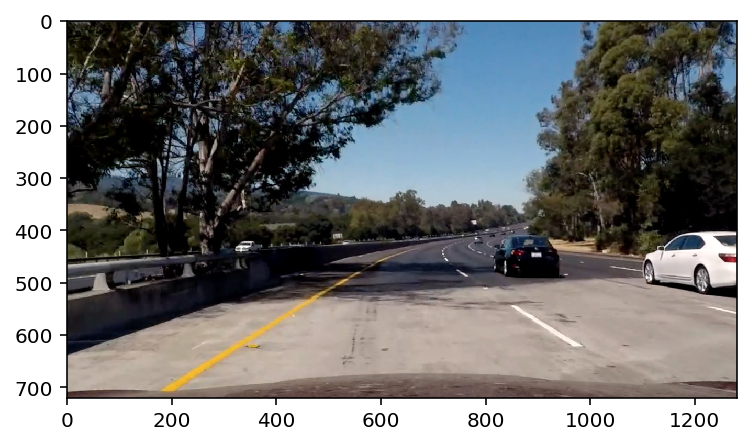

In [5]:
undist = cv2.undistort(image, mtx, dist, None, mtx)
undist_rgb = cv2.cvtColor(undist, cv2.COLOR_BGR2RGB)
plt.imshow(undist_rgb)

In [6]:
# 3. Use color transforms, gradients, etc., to create a thresholded binary image.
gradx = abs_sobel_thresh(undist, orient='x', sobel_kernel=3, thresh=(20, 255))

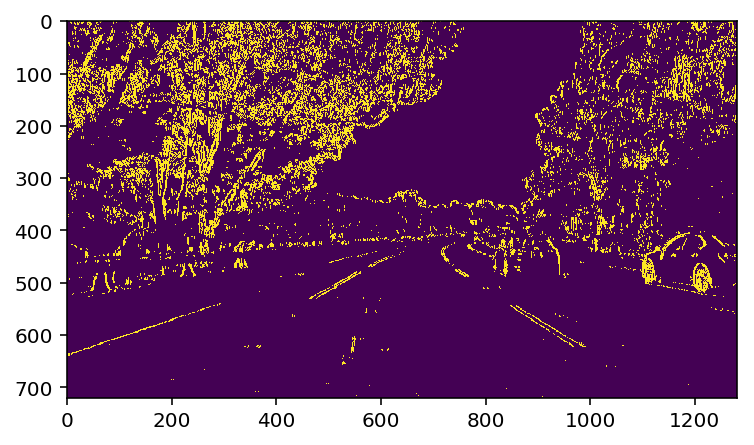

In [7]:
plt.imshow(gradx)

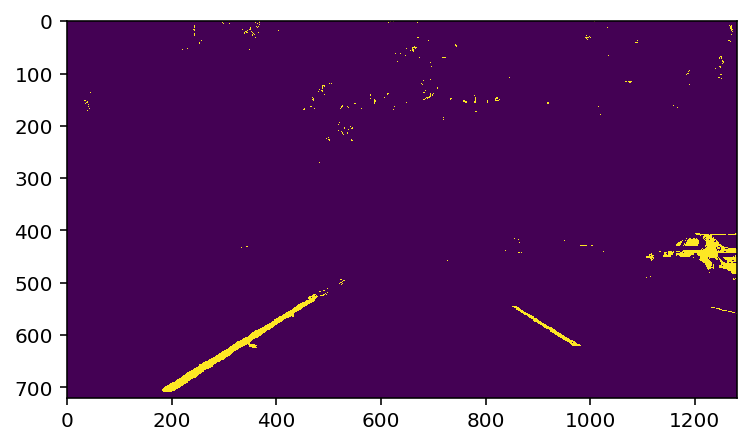

In [8]:
ls_binary = ls_thresh(undist, thresh=[120,50])
plt.imshow(ls_binary)

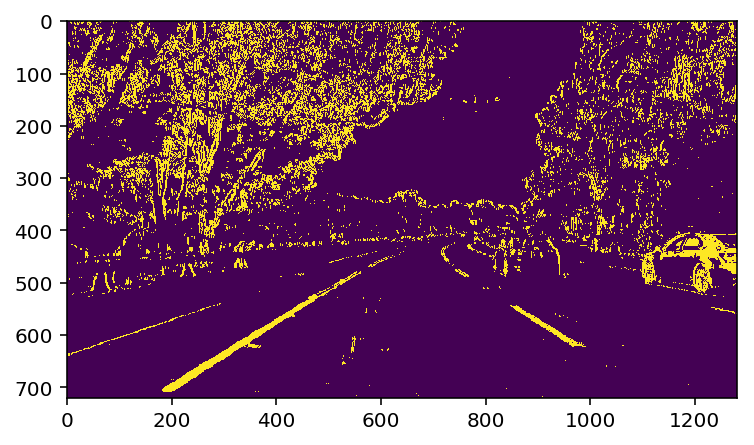

In [9]:
combined = combine_two_thresholds(gradx, ls_binary)
plt.imshow(combined)

In [10]:
# 4. Apply a perspective transform to rectify binary image ("birds-eye view").

In [22]:
M, warped, Minv =  warp_image(combined)

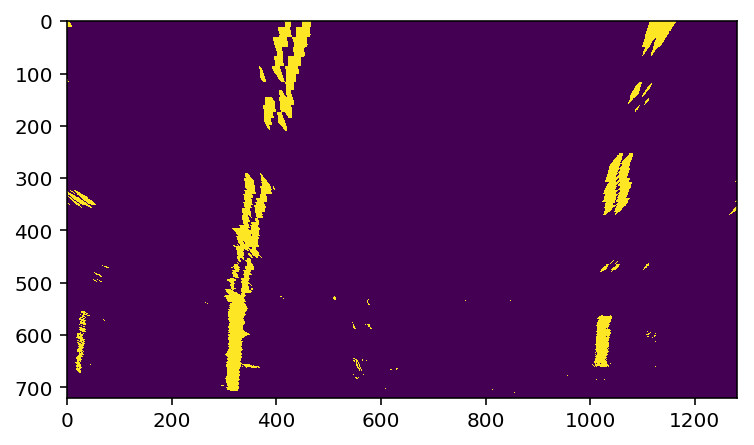

In [23]:
plt.imshow(warped)

In [13]:
# 5. Detect lane pixels and fit to find the lane boundary.
# 6. Determine the curvature of the lane and vehicle position with respect to center.

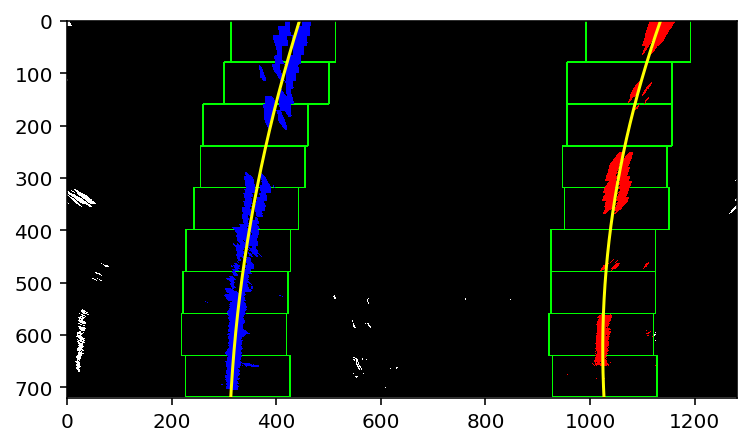

In [24]:
left_fitx, right_fitx, ploty, curv_left, curv_right, dist_from_center = detect_lane(warped)

In [15]:
# 7. Warp the detected lane boundaries back onto the original image.

In [25]:
final = draw_lane(undist, warped, Minv, left_fitx, right_fitx, ploty, curv_left, curv_right, dist_from_center)

In [26]:
final_rgb = cv2.cvtColor(final, cv2.COLOR_BGR2RGB)

In [27]:
# 8. Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

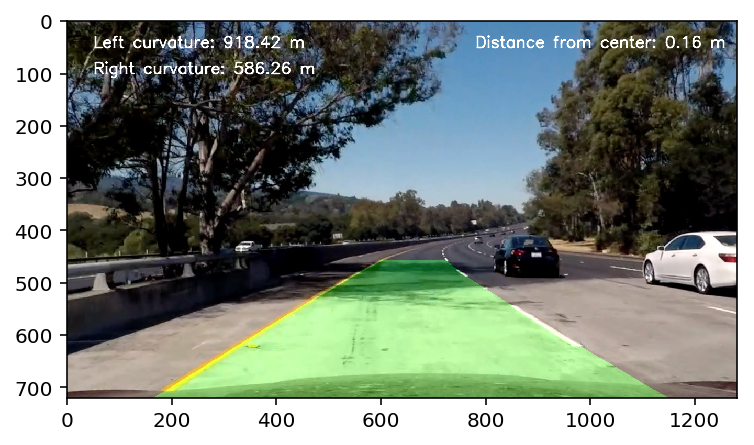

In [28]:
plt.imshow(final_rgb)